In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

cancer=load_breast_cancer()

In [13]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=56)
tree.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=56,
            splitter='best')

In [15]:
print('Accuracy of Decision Tree on train set: {:.3f}'.format(tree.score(Xtrain,ytrain)))
print('Accuracy of Decision Tree on test set: {:.3f}'.format(tree.score(Xtest,ytest)))

Accuracy of Decision Tree on train set: 1.000
Accuracy of Decision Tree on test set: 0.923


From the accuracy check above, we can see that the decision tree has overfit the training set.<br>
To counteract this, we'll do some pre-pruning of the tree, such as limiting the maximum depth.

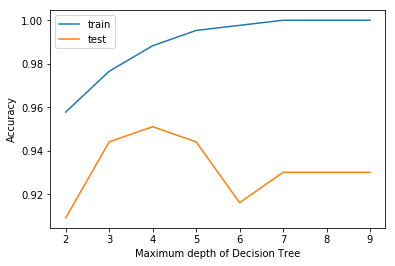

In [50]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

train_accuracy=[]
test_accuracy=[]

depth_range=range(2,10)

for i in depth_range:
    classifier=DecisionTreeClassifier(max_depth=i,random_state=64)
    classifier.fit(Xtrain,ytrain)
    train_accuracy.append(classifier.score(Xtrain,ytrain))
    test_accuracy.append(classifier.score(Xtest,ytest))
    
plt.plot(depth_range,train_accuracy,label='train')
plt.plot(depth_range,test_accuracy,label='test')
plt.xlabel('Maximum depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()

So we're getting a decent fit at depth=4.